In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
def wrangle(filepath):
    # Load data
    df = pd.read_csv(filepath)  

    # Remove "/year" and "/day".
    df["Price"] = df["Price"].str.replace(r"/\w+", "", regex=True) 
    df["Price"] = df["Price"].str.replace(",", "").astype(float)

     # Extract numbers and fill NaN with 0 and convert to int
    df["Bathrooms"] = df["Bathrooms"].str.extract(r"(\d+)")  
    df["Bathrooms"] = df["Bathrooms"].fillna(0).astype(int)
    
    df["Bedrooms"] = df["Bedrooms"].str.extract(r"(\d+)")  
    df["Bedrooms"] = df["Bedrooms"].fillna(0).astype(int)
    
    df["Toilets"] = df["Toilets"].str.extract(r"(\d+)") 
    df["Toilets"] = df["Toilets"].fillna(0).astype(int)

    # Remove extreme outliers (below 100K or above 40M NGN)
    df = df[(df["Price"] >= 100000) & (df["Price"] <= 40000000)]
    



    return df 

In [12]:
filepath = "C:/Users/KINGLEY EYO/Downloads/housinginlagos.csv"
df = wrangle(filepath)

In [13]:
df.head()

,Title,More Info,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City,Neighborhood
0,Newly Built 4 Bedroom Semi Detached House With Bq,4 BEDROOM HOUSE FOR RENT,5000000.0,0,1,0,4,4,5,Lekki,Agungi
1,Superb 4 Bedroom Semi Detached Duplex With Bq,4 BEDROOM HOUSE FOR RENT,5000000.0,0,1,0,4,4,5,Lekki,Other Lekki
2,Furnished 2 Bedroom Terrace Duplex For Rent !!!,2 BEDROOM HOUSE FOR RENT,3500000.0,1,0,0,2,3,3,Lekki,Osapa London
3,2 Bedroom Apartment For Rent,2 BEDROOM HOUSE FOR RENT,2700000.0,1,1,0,2,3,3,Lekki,Ologolo
4,4 Bedroom Terrace Duplex For Rent,4 BEDROOM HOUSE FOR RENT,4000000.0,1,0,0,4,5,5,Lekki,Chevron


In [7]:
df.to_csv(r'C:\Users\KINGLEY EYO\Documents\housing_in_lagos_cleaned_data.csv', index=False)


In [15]:
# Group by City and calculate average price
avg_price_city = df.groupby('City', as_index=False)['Price'].mean()
avg_price_city.columns = ['City', 'Average_Price']

# Group by Neighborhood and calculate average price
avg_price_neighborhood = df.groupby('Neighborhood', as_index=False)['Price'].mean()
avg_price_neighborhood.columns = ['Neighborhood', 'Average_Price']


print("Average House Prices by City:\n", avg_price_city)
print("\nAverage House Prices by Neighborhood:\n", avg_price_neighborhood)

Average House Prices by City:
        City  Average_Price
0      Ajah   1.465496e+06
1   Gbagada   1.446077e+06
2     Ikeja   3.952847e+06
3     Ikoyi   1.202389e+07
4    Island   7.797697e+06
5     Lekki   3.876316e+06
6     Ojodu   1.485587e+06
7  Surulere   1.277284e+06
8      Yaba   1.112504e+06

Average House Prices by Neighborhood:
                  Neighborhood  Average_Price
0                        1004   4.974225e+06
1                     Adelabu   1.686348e+06
2               Adeniyi Jones   3.202124e+06
3                Adeola Odeku   1.141554e+07
4                         Ado   1.205441e+06
..                        ...            ...
64                  Sangotedo   1.449924e+06
65                     Soluyi   1.119415e+06
66               Toyin street   1.716277e+06
67  Victoria Island Extension   9.035858e+06
68                     alausa   3.440157e+06

[69 rows x 2 columns]


In [18]:
save_path = "C:/Users/KINGLEY EYO/Documents/"

In [19]:
avg_price_city.to_csv(save_path + "average_price_city.csv", index=False)
avg_price_neighborhood.to_csv(save_path + "average_price_neighborhood.csv", index=False)

In [23]:

print(df["Bedrooms"].value_counts())

Bedrooms
3     13593
1     10633
2     10114
4      9085
0      5451
5      2825
6       281
10      131
7        78
8        56
9        18
Name: count, dtype: int64


In [24]:
# Bedroom count data
bedrooms = [3, 1, 2, 4, 0, 5, 6, 10, 7, 8, 9]
counts = [13593, 10633, 10114, 9085, 5451, 2825, 281, 131, 78, 56, 18]

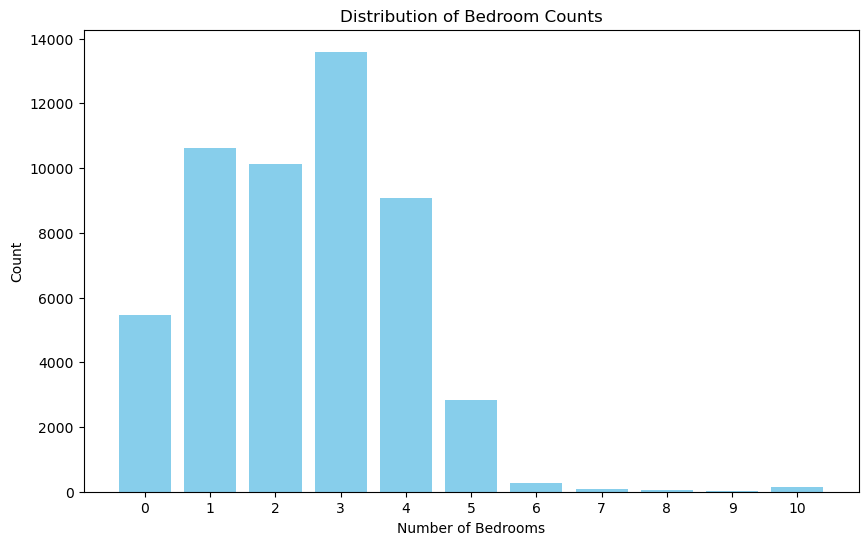

In [27]:
# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(bedrooms, counts, color="skyblue")

# Labels and title
plt.xlabel("Number of Bedrooms")
plt.ylabel("Count")
plt.title("Distribution of Bedroom Counts")
plt.xticks(bedrooms)  

# Show plot
plt.show()

In [20]:
# Group by City and Bedrooms, then calculate average price
avg_price_per_bedroom = df.groupby(["City", "Bedrooms"])["Price"].mean().reset_index()

# Display the results
print(avg_price_per_bedroom)

    City  Bedrooms         Price
0   Ajah         0  1.288209e+06
1   Ajah         1  5.760500e+05
2   Ajah         2  1.232887e+06
3   Ajah         3  1.566011e+06
4   Ajah         4  2.987220e+06
..   ...       ...           ...
87  Yaba         5  3.395455e+06
88  Yaba         6  2.000000e+06
89  Yaba         8  3.000000e+06
90  Yaba         9  5.000000e+06
91  Yaba        10  6.500000e+06

[92 rows x 3 columns]


In [ ]:
avg_price_neighborhood.to_csv(save_path + "average_price_neighborhood.csv", index=False)

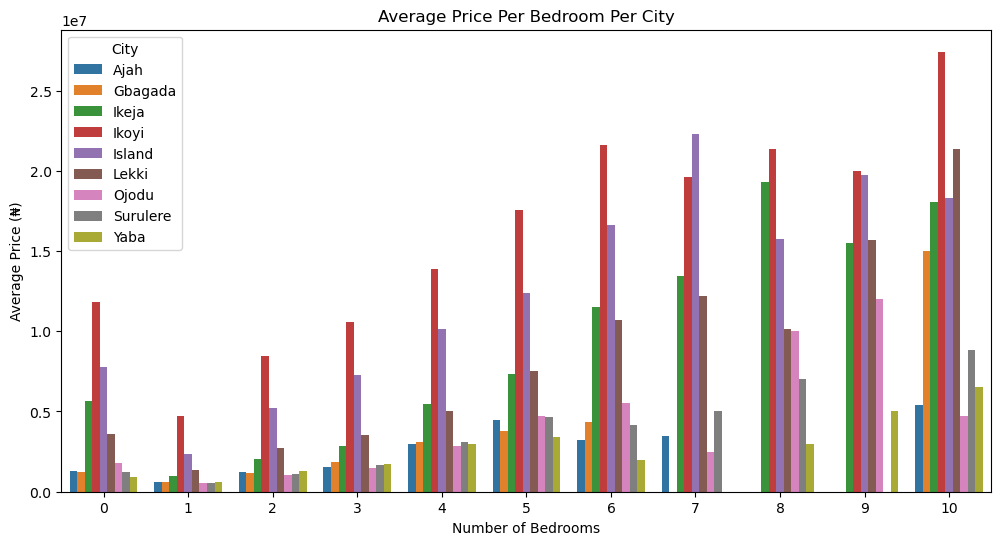

In [30]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Bedrooms", y="Price", hue="City", data=avg_price_per_bedroom)

# Labels and Title
plt.xlabel("Number of Bedrooms")
plt.ylabel("Average Price (₦)")
plt.title("Average Price Per Bedroom Per City")
plt.legend(title="City")

# Show plot
plt.show()

In [32]:
# Group by Bedroom count and calculate the average price
avg_price_per_bedroom = df.groupby("Bedrooms")["Price"].mean().reset_index()

# Display the results
print(avg_price_per_bedroom)

    Bedrooms         Price
0          0  3.370249e+06
1          1  9.398243e+05
2          2  2.101418e+06
3          3  3.785816e+06
4          4  6.223090e+06
5          5  8.463631e+06
6          6  1.145135e+07
7          7  1.363846e+07
8          8  1.465179e+07
9          9  1.594444e+07
10        10  1.771350e+07
